Лабораторная работа №4: Обучению первой модели на TensorFlow для распознавания рукописных цифр на датасете MNIST:

Шаг 1: Загрузка и предобработка данных

Импортируйте необходимые библиотеки: tensorflow и tensorflow.keras.datasets.mnist
Загрузите датасет MNIST с помощью функции mnist.loaddata()
Предобработайте данные: нормализуйте их, преобразуйте в нужный формат (например, масштабирование от 0 до 1)

In [ ]:
#импорт библиотек
import tensorflow as tf
import numpy as np
import ssl
from tensorflow.keras.datasets import mnist

#загрузка датасета
# Фикс ошибки с SSL сертификатами
ssl._create_default_https_context = ssl._create_unverified_context


# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

# Предобработка данных
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


Шаг 2: Создание нейронной сети
- Используйте модель Sequential из библиотеки tensorflow.keras.models
- Добавьте слои к модели: открытый слой Flatten с inputshape=(28, 28), полносвязанный слой Dense с 128 нейронами и функцией активации ReLU, полносвязанный слой Dense с 10 нейронами и функцией активации softmax

In [ ]:
# Создание нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Шаг 3: Компиляция модели
- Компилируйте модель с оптимизатором 'adam', функцией потерь 'sparsecategoricalcrossentropy' и метрикой 'accuracy'


In [ ]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Шаг 4: Обучение модели
- Используйте метод fit для обучения модели на обучающем наборе данных с указанием числа эпох (например, 5 эпох)

In [ ]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2544 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1111 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9864


Шаг 5: Оценка качества модели
- Используйте метод evaluate для оценки качества модели на тестовом наборе данных
- Выведите точность модели на тестовом наборе данных

In [ ]:
# Оценка качества модели
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точность модели на тестовом наборе данных: {test_accuracy}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9757
Точность модели на тестовом наборе данных: 0.9757000207901001


Шаг 6: Анализ результатов
- Импортируйте библиотеку matplotlib.pyplot для построения графика
- Постройте график кривой обучения (accuracy) с помощью данных из истории обучения

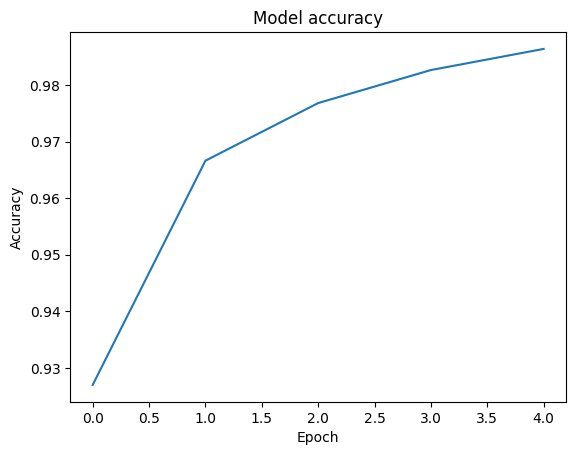

In [ ]:
# Анализ результатов
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()